In [122]:
# The code is written by Jawwad Shadman Siddique
# Importing Libraries

import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [123]:
# Checking the working directory
os.getcwd()

'C:\\Users\\USER\\CE_5333\\Assignment 01'

In [124]:
# Reading the Data

a = pd.read_csv('HoustonAQIinp.csv')

In [125]:
a.head()

,tottime,NOX.ts,OZONE.ts,BARO.ts,RELH.ts,DEWPT.ts,TEMP.ts,SRAD.ts,WSPEED.ts,WDIR.ts
0,1/1/2017 0:00,16.45710,3.99490,1010.83,89.4600,63.0142,66.2158,0.0,1.79924,206.810
1,1/1/2017 1:00,13.92407,2.70302,1010.16,90.7717,62.6108,65.4292,0.0,2.14573,224.387
2,1/1/2017 2:00,11.39104,5.41001,1010.39,91.3017,62.4425,65.0717,0.0,2.57577,202.498
3,1/1/2017 3:00,8.85801,7.62012,1011.24,91.8733,62.5842,65.0408,0.0,1.02421,120.443
4,1/1/2017 4:00,8.29567,4.89723,1011.46,92.2408,62.3417,64.6542,0.0,1.23521,163.555


In [126]:
# Getting the size of the dataframe

a.shape

(26280, 10)

In [127]:
# Removing '.ts' suffix from the column names

a.columns
aa = a.copy()
aa.columns = aa.columns.str.replace('.ts', '')
aa.head()

,tottime,NOX,OZONE,BARO,RELH,DEWPT,TEMP,SRAD,WSPEED,WDIR
0,1/1/2017 0:00,16.45710,3.99490,1010.83,89.4600,63.0142,66.2158,0.0,1.79924,206.810
1,1/1/2017 1:00,13.92407,2.70302,1010.16,90.7717,62.6108,65.4292,0.0,2.14573,224.387
2,1/1/2017 2:00,11.39104,5.41001,1010.39,91.3017,62.4425,65.0717,0.0,2.57577,202.498
3,1/1/2017 3:00,8.85801,7.62012,1011.24,91.8733,62.5842,65.0408,0.0,1.02421,120.443
4,1/1/2017 4:00,8.29567,4.89723,1011.46,92.2408,62.3417,64.6542,0.0,1.23521,163.555


In [128]:
# Extracting wind speed and wind direction

WSWD = aa[['WSPEED','WDIR']]
WSWD.head()

,WSPEED,WDIR
0,1.79924,206.810
1,2.14573,224.387
2,2.57577,202.498
3,1.02421,120.443
4,1.23521,163.555


In [129]:
# Using loc command - extract the values for Ozone > 10ppb & Temperature > 70F

cond = (aa.TEMP>70) & (aa.OZONE>10)
aa.loc[cond].head()

,tottime,NOX,OZONE,BARO,RELH,DEWPT,TEMP,SRAD,WSPEED,WDIR
13,1/1/2017 13:00,4.62517,28.5327,1010.68,71.3617,61.8575,71.6792,0.46715,1.18101,136.9780
14,1/1/2017 14:00,3.85794,31.4623,1009.95,68.5192,62.1525,73.1658,0.35832,2.45810,66.2329
15,1/1/2017 15:00,2.58504,33.3266,1009.97,67.7467,62.6450,73.8817,0.27196,2.09219,84.5627
16,1/1/2017 16:00,2.46298,30.0909,1010.69,73.5200,64.4017,73.3275,0.11182,2.28836,93.7752
17,1/1/2017 17:00,6.93558,23.8978,1010.97,78.6292,64.9217,71.9550,0.01678,3.66573,96.6015


In [130]:
# Using iloc command - subset data for the year 2017

# Convert the total time into datetime format in pandas and create a separate column
aa['date'] = pd.to_datetime(aa['tottime'], format="%m/%d/%Y %H:%S")

# Create a Year Column
aa['year']= aa['date'].dt.year
aa.head()

# Extract data corresponding to year = 2017
# Column number for corresponding 'year' column is 11

aa[aa.iloc[:, 11] == 2017].head()

,tottime,NOX,OZONE,BARO,RELH,DEWPT,TEMP,SRAD,WSPEED,WDIR,date,year
0,1/1/2017 0:00,16.45710,3.99490,1010.83,89.4600,63.0142,66.2158,0.0,1.79924,206.810,2017-01-01 00:00:00,2017
1,1/1/2017 1:00,13.92407,2.70302,1010.16,90.7717,62.6108,65.4292,0.0,2.14573,224.387,2017-01-01 01:00:00,2017
2,1/1/2017 2:00,11.39104,5.41001,1010.39,91.3017,62.4425,65.0717,0.0,2.57577,202.498,2017-01-01 02:00:00,2017
3,1/1/2017 3:00,8.85801,7.62012,1011.24,91.8733,62.5842,65.0408,0.0,1.02421,120.443,2017-01-01 03:00:00,2017
4,1/1/2017 4:00,8.29567,4.89723,1011.46,92.2408,62.3417,64.6542,0.0,1.23521,163.555,2017-01-01 04:00:00,2017


In [131]:
# Summary Statistics & Percentile for NOX & OZONE

aa['NOX'].describe()

count    26280.000000
mean        10.373405
std         15.017069
min          0.000000
25%          2.986596
50%          5.776210
75%         11.403741
max        256.540000
Name: NOX, dtype: float64

In [132]:
aa['OZONE'].describe()

count    26280.000000
mean        24.868725
std         17.097665
min          0.012360
25%         11.841075
50%         22.763400
75%         35.278900
max        144.551000
Name: OZONE, dtype: float64

In [133]:
# Time Series of Ozone

# Extracting required columns

time = aa[['tottime', 'OZONE']]
time.head()

time['tottime'] = pd.to_datetime(time['tottime'], format="%m/%d/%Y %H:%S")
time.head()

# Converting to time series:
ts = time['OZONE']
ts.head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_18412\4263406182.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['tottime'] = pd.to_datetime(time['tottime'], format="%m/%d/%Y %H:%S")


0    3.99490
1    2.70302
2    5.41001
3    7.62012
4    4.89723
5    3.72857
6    1.78876
7    1.15673
8    1.90006
9    2.15446
Name: OZONE, dtype: float64

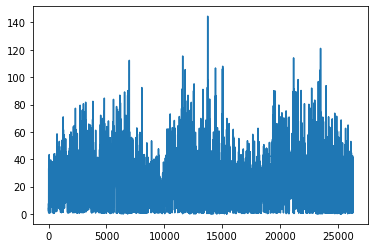

In [134]:
# Plotting the time series

plt.plot(ts)

In [135]:
# Writing the time series for hourly OZONE data
ts.to_csv('O3.csv')


In [136]:
# Pandas Cut function to divide e O3 into three categories - [0, 5) ; [5 -10) and [10 - ∞)
# Label: ‘Low’, ‘Medium’ and ‘High’
# New column as ‘O3CAT’ to the object aa

pd.cut(aa.OZONE, bins=[0, 5, 10, float('inf')]).value_counts()

aa['O3CAT'] = pd.cut(aa.OZONE, bins=[0, 5, 10, float('inf')])

aa.head()

,tottime,NOX,OZONE,BARO,RELH,DEWPT,TEMP,SRAD,WSPEED,WDIR,date,year,O3CAT
0,1/1/2017 0:00,16.45710,3.99490,1010.83,89.4600,63.0142,66.2158,0.0,1.79924,206.810,2017-01-01 00:00:00,2017,"(0.0, 5.0]"
1,1/1/2017 1:00,13.92407,2.70302,1010.16,90.7717,62.6108,65.4292,0.0,2.14573,224.387,2017-01-01 01:00:00,2017,"(0.0, 5.0]"
2,1/1/2017 2:00,11.39104,5.41001,1010.39,91.3017,62.4425,65.0717,0.0,2.57577,202.498,2017-01-01 02:00:00,2017,"(5.0, 10.0]"
3,1/1/2017 3:00,8.85801,7.62012,1011.24,91.8733,62.5842,65.0408,0.0,1.02421,120.443,2017-01-01 03:00:00,2017,"(5.0, 10.0]"
4,1/1/2017 4:00,8.29567,4.89723,1011.46,92.2408,62.3417,64.6542,0.0,1.23521,163.555,2017-01-01 04:00:00,2017,"(0.0, 5.0]"


In [137]:
# Using pandas pivot_table function with O3CAT as column and aggregated using sum

pd.pivot_table(aa, index='O3CAT', aggfunc=sum)

,BARO,DEWPT,NOX,OZONE,RELH,SRAD,TEMP,WDIR,WSPEED,year
O3CAT,,,,,,,,,,
"(0.0, 5.0]",3.392426e+06,1.947854e+05,110327.682418,6580.182552,2.867404e+05,72.055770,2.093774e+05,5.556225e+05,6047.457950,6721995
"(5.0, 10.0]",2.233960e+06,1.385127e+05,29565.810220,16687.039687,1.829928e+05,108.236870,1.505529e+05,3.515799e+05,7286.962720,4431516
"(10.0, inf]",2.110574e+07,1.219398e+06,132719.596642,630282.872292,1.376730e+06,6646.510395,1.491929e+06,3.284879e+06,124914.458385,41879529


In [146]:
aa['cat'] = pd.cut(aa.OZONE, [0,5,10,float('inf')], labels=['A', 'B', 'C'])
aa.head()

,tottime,NOX,OZONE,BARO,RELH,DEWPT,TEMP,SRAD,WSPEED,WDIR,date,year,O3CAT,cat
0,1/1/2017 0:00,16.45710,3.99490,1010.83,89.4600,63.0142,66.2158,0.0,1.79924,206.810,2017-01-01 00:00:00,2017,"(0.0, 5.0]",A
1,1/1/2017 1:00,13.92407,2.70302,1010.16,90.7717,62.6108,65.4292,0.0,2.14573,224.387,2017-01-01 01:00:00,2017,"(0.0, 5.0]",A
2,1/1/2017 2:00,11.39104,5.41001,1010.39,91.3017,62.4425,65.0717,0.0,2.57577,202.498,2017-01-01 02:00:00,2017,"(5.0, 10.0]",B
3,1/1/2017 3:00,8.85801,7.62012,1011.24,91.8733,62.5842,65.0408,0.0,1.02421,120.443,2017-01-01 03:00:00,2017,"(5.0, 10.0]",B
4,1/1/2017 4:00,8.29567,4.89723,1011.46,92.2408,62.3417,64.6542,0.0,1.23521,163.555,2017-01-01 04:00:00,2017,"(0.0, 5.0]",A
